# Spotify Dataset Exploratory Data Analysis

## Importing wanted libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
sns.set_style("darkgrid")

## Load Dataset

In [7]:
df = pd.read_csv("/content/data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## Data Cleaning

In [8]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [10]:
df.shape

(2017, 16)

In [11]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [12]:
len(df.columns)

16

In [13]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Data Analysis

### Top 5 most popular artists

In [14]:
top_five_artists = df.groupby("artist").count().sort_values(by="song_title", ascending=False)["song_title"][:5]
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

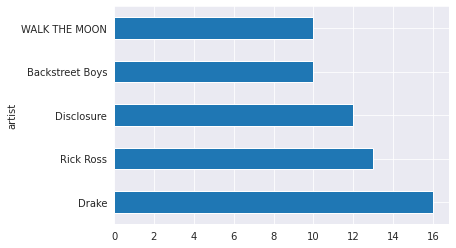

In [15]:
top_five_artists.plot.barh()
plt.show()

### Top 5 loudest tracks

In [16]:
top_five_loudest_tracks = df[["loudness", "song_title"]].sort_values(by="loudness", ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


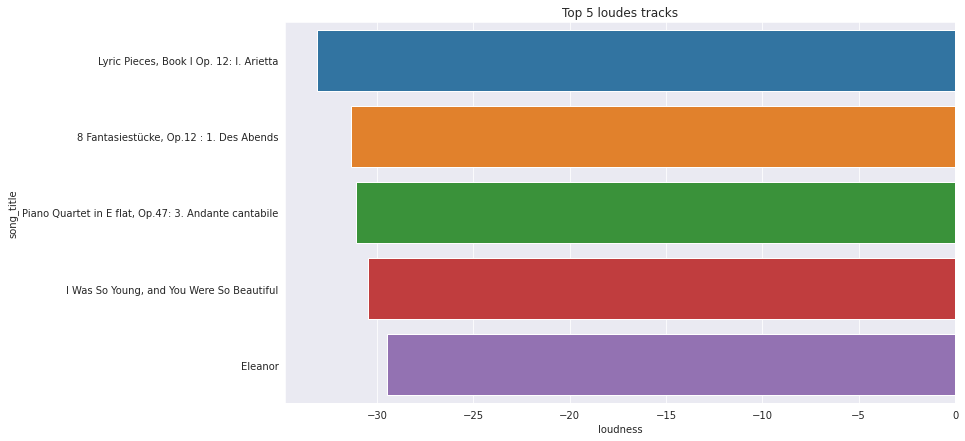

In [17]:
plt.figure(figsize=(12, 7))
sns.barplot(x="loudness", y="song_title", data=top_five_loudest_tracks)
plt.title("Top 5 loudes tracks")
plt.show()

### Artist with the most danceability song

In [18]:
top_five_artists_danceable_songs = df[["danceability", "song_title", "artist"]].sort_values(by="danceability", 
                                                                                            ascending=False)[:5]
top_five_artists_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


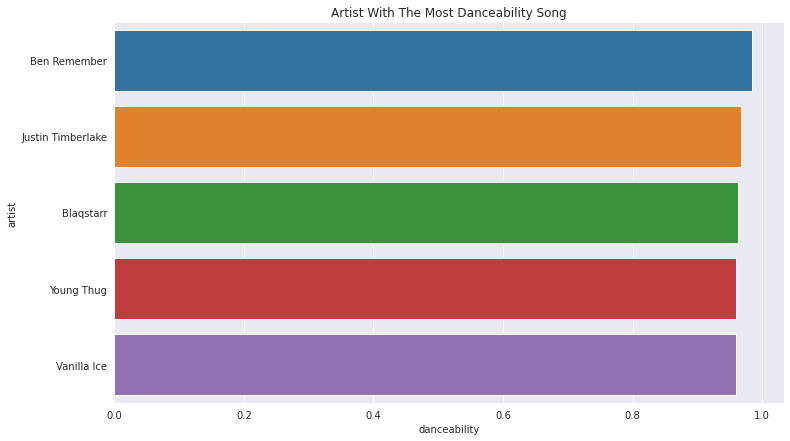

In [19]:
plt.figure(figsize=(12, 7))
sns.barplot(x="danceability", y="artist", data=top_five_artists_danceable_songs)
plt.title("Artist With The Most Danceability Song")
plt.show()

### To 10 instrumentalness tracks

In [20]:
top_ten_instrumental_tracks = df[["instrumentalness", "song_title", "artist"]].sort_values(by="instrumentalness", 
                                                                                           ascending=False)[:5]
top_ten_instrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


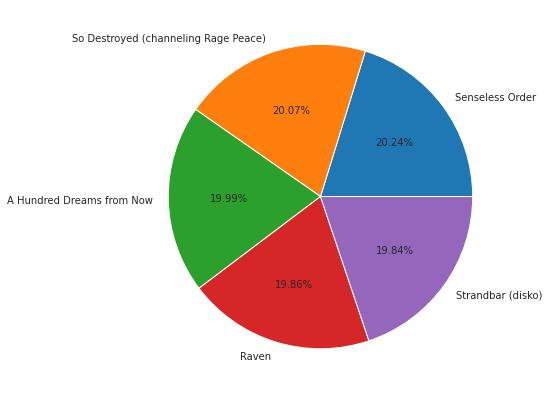

In [21]:
plt.figure(figsize=(12, 7))
plt.pie(x="instrumentalness", data=top_ten_instrumental_tracks, autopct='%1.2f%%', labels=top_ten_instrumental_tracks.song_title)
plt.show()

## Top 10 energetic tracks

In [22]:
Energetic_tracks = df[["energy","song_title"]].sort_values(by="energy",ascending=False)[:10]
Energetic_tracks 

,energy,song_title
1299,0.998,No Absolution
1322,0.997,Pitchblack
1297,0.994,A Darkened Gospel
1347,0.993,Unanswered
2015,0.992,First Contact
1680,0.992,Paranoia
1332,0.992,Beautiful Agony
1328,0.991,Down into the Abyss
1681,0.990,Hated
1296,0.990,Black Colors


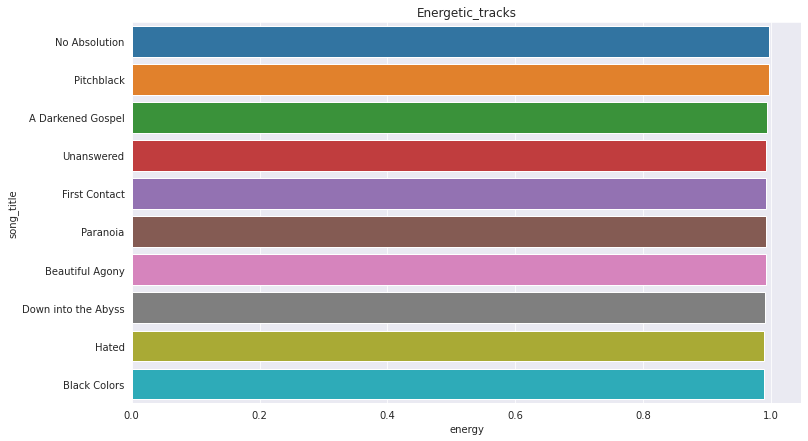

In [23]:
plt.figure(figsize=(12, 7))
sns.barplot(x="energy", y="song_title", data=Energetic_tracks)
plt.title("Energetic_tracks")
plt.show()

## Top 10 tracks with most valence

In [24]:
Trending_genre = df[["valence","song_title"]].sort_values(by="valence",ascending=False)[:10]
Trending_genre 

,valence,song_title
460,0.992,Abataka - Original Mix
912,0.975,I'm Walkin' - 2002 Digital Remaster
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)"
207,0.973,Look at You
48,0.973,Azon de ma gnin kpevi
337,0.972,Let's Lovedance Tonight - Danny Krivit Re-edit...
1590,0.972,Jelly On A Plate
838,0.971,Let's Lovedance Tonight - Danny Krivit Re-edit...
497,0.968,Mi Swing es Tropical
112,0.967,Please Mr. Postman


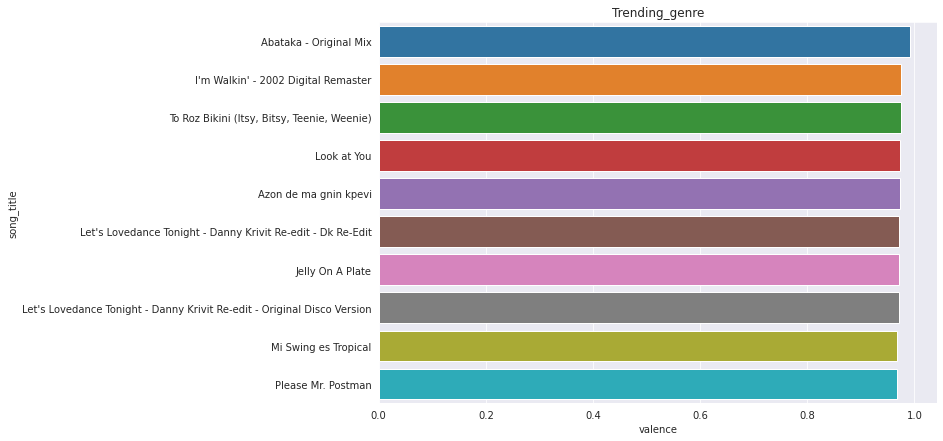

In [33]:
plt.figure(figsize=(10, 7))
sns.barplot(x="valence", y="song_title", data=Trending_genre)
plt.title("Trending_genre")
plt.show()

## Artist with most number of songs (top 5)

In [28]:
Most_popular = df.groupby("song_title").count().sort_values(by="artist",ascending=False)["artist"][:5]
Most_popular 

song_title
Jack                                    3
River                                   3
I Know There's Gonna Be (Good Times)    2
Forever                                 2
What I Might Do - Club Mix              2
Name: artist, dtype: int64

## Most liveness songs(top 5)

In [44]:
More_liveness = df.sort_values(by = "liveness",ascending=False)[["song_title","liveness"]][:5]
More_liveness 

,song_title,liveness
783,dance yrself clean - live at madison square ga...,0.969
217,High School Lover,0.963
955,You Are My Special Angel,0.953
1432,Best Thing About,0.924
444,Gucci Gucci,0.910


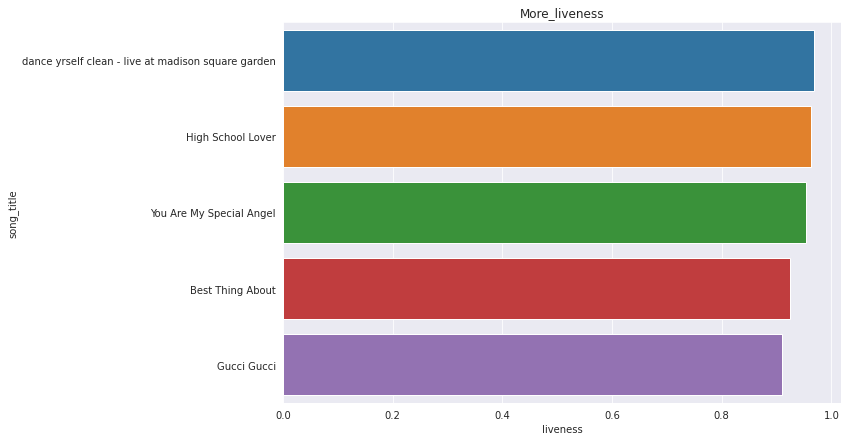

In [45]:
plt.figure(figsize=(10, 7))
sns.barplot(x="liveness", y="song_title", data=More_liveness)
plt.title("More_liveness")
plt.show()

## Songs with more danceability(top 10)

In [41]:
More_danceability = df.sort_values(by = "danceability",ascending=False)[["song_title","danceability"]][:10]
More_danceability 

,song_title,danceability
1433,Flashwind - Radio Edit,0.984
1901,SexyBack,0.967
604,Check Me Out Like,0.962
32,Best Friend,0.959
1957,Ice Ice Baby,0.959
1136,Bad Liar,0.950
1977,Fuck Kd,0.947
138,Sippin On Some Syrup,0.944
623,I'm Different,0.941
1591,Little Green Apple,0.941


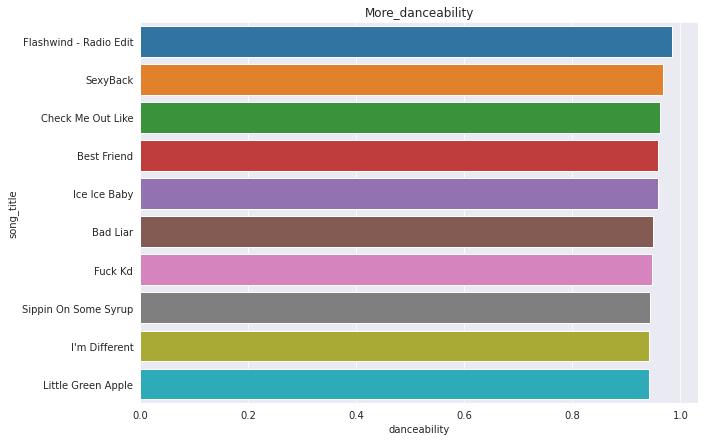

In [42]:
plt.figure(figsize=(10, 7))
sns.barplot(x="danceability", y="song_title", data=More_danceability)
plt.title("More_danceability")
plt.show()

## Most duration song

In [37]:
Most_duration = df.sort_values(by="duration_ms",ascending=False)[["song_title","duration_ms"]][:5]
Most_duration 

,song_title,duration_ms
1535,The Nearness of You,1004627
695,Music Is the Answer - Original Extended 12-Inc...,849960
819,Southern Man - Live,825027
1603,Viola Sonata in C Minor: III. Andante con vari...,784013
1565,Gloomy Sunday,763467


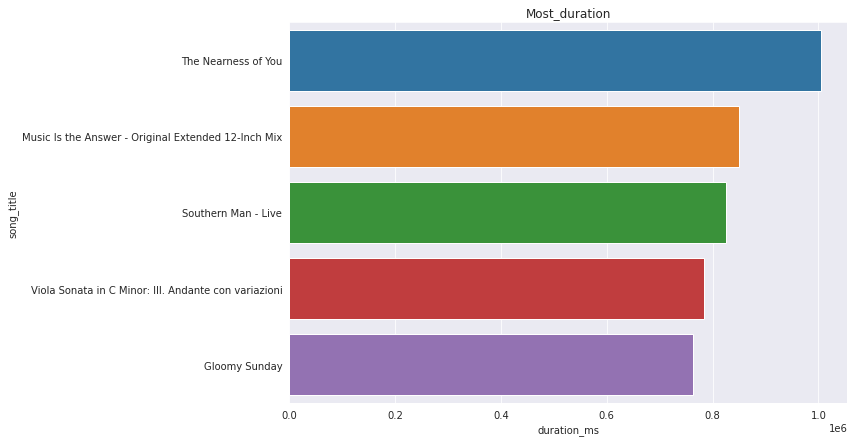

In [38]:
plt.figure(figsize=(10, 7))
sns.barplot(x="duration_ms", y="song_title", data=Most_duration)
plt.title("Most_duration")
plt.show()